# Проблема посещаемости собеседований соискателями

**Состав команды:** Гайдарбекова Диана, Смагина Александра, Сорвина Алена.  

**Цель работы:** выявление факторов (характеристики работы и персональные характеристики), влияющих на то, что кандидат может не придет на интервью. 

**Задачи:** 

1. Предобработка и очистка данных. 
2. Визуализация данных.
3. Анализ с помощью Хи-квадрата для выявления связи между переменными и посещением интервью. 
4. Бинарная логистическая регрессия.

**Датасет:** https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem 

**Github:** https://github.com/dshgaydarbekova/2020_HR_Analytics_Project_Interview_Attendance_Problem 

### Импорт библиотек

In [1]:
# For data manipulation

import pandas as pd

import numpy as np

# For data vizualization

import seaborn as sns

import matplotlib.pyplot as plt

### Загрузка датасета через Github, предобработка и очистка данных

In [2]:
# To use dataset

path = "https://raw.githubusercontent.com/dshgaydarbekova/2020_HR_Analytics_Project_Interview_Attendance_Problem/master/Interview.csv"

data = pd.read_csv(path)

In [3]:
# To see the names of the columns

data.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [4]:
# To remove columns that we do not need for our analysis (we want to analyze only personal and job characteristics without characteristics of an interview and location)

data=data.drop(['Name(Cand ID)', 'Date of Interview', 'Client name', 'Location', 'Interview Type', 'Nature of Skillset', 'Candidate Current Location', 'Candidate Job Location', 'Interview Venue', 'Candidate Native location', 'Have you obtained the necessary permission to start at the required time', 'Hope there will be no unscheduled meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview', 'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much', 'Have you taken a printout of your updated resume. Have you read the JD and understood the same', 'Are you clear with the venue details and the landmark.', 'Has the call letter been shared', 'Expected Attendance'], axis = 1)

In [5]:
# To see what factors to analyze (names of the columns)

data.head()

,Industry,Position to be closed,Gender,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Pharmaceuticals,Production- Sterile,Male,No,Single,NaN,NaN,NaN,NaN,NaN
1,Pharmaceuticals,Production- Sterile,Male,No,Single,NaN,NaN,NaN,NaN,NaN
2,Pharmaceuticals,Production- Sterile,Male,No,Single,NaN,NaN,NaN,NaN,NaN
3,Pharmaceuticals,Production- Sterile,Male,No,Single,NaN,NaN,NaN,NaN,NaN
4,Pharmaceuticals,Production- Sterile,Male,No,Married,NaN,NaN,NaN,NaN,NaN


In [6]:
# To remove empty columns

data=data.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis = 1)

In [7]:
# To see what factors to analyze (names of the columns)

data.head()

,Industry,Position to be closed,Gender,Observed Attendance,Marital Status
0,Pharmaceuticals,Production- Sterile,Male,No,Single
1,Pharmaceuticals,Production- Sterile,Male,No,Single
2,Pharmaceuticals,Production- Sterile,Male,No,Single
3,Pharmaceuticals,Production- Sterile,Male,No,Single
4,Pharmaceuticals,Production- Sterile,Male,No,Married


In [8]:
# To remove rows with at least one empty cell
data=data.dropna()

In [9]:
data.tail()

,Industry,Position to be closed,Gender,Observed Attendance,Marital Status
1228,Pharmaceuticals,Niche,Male,Yes,Married
1229,Pharmaceuticals,Niche,Male,Yes,Single
1230,Pharmaceuticals,Niche,Male,Yes,Married
1231,Pharmaceuticals,Niche,Male,Yes,Single
1232,Pharmaceuticals,Niche,Female,Yes,Single


In [10]:
# To clean

data['Industry'].value_counts()

replace_dictionary = {'IT Products and Services': 'IT', 'IT Services': 'IT'}

data['Industry'].replace(replace_dictionary, inplace=True)

data['Industry'].value_counts()


BFSI               949
Pharmaceuticals    165
IT                  79
Electronics         23
Telecom             17
Name: Industry, dtype: int64

In [11]:
data['Position to be closed'].value_counts()

replace_dictionary = {'Dot Net': 'Routine', 'Trade Finance': 'Niche', 'AML': 'Niche', 'Selenium testing': 'Routine', 'Production- Sterile': 'Routine'}

data['Position to be closed'].replace(replace_dictionary, inplace=True)

data['Position to be closed'].value_counts()

Routine    1051
Niche       182
Name: Position to be closed, dtype: int64

In [12]:
data['Gender'].value_counts()

Male      965
Female    268
Name: Gender, dtype: int64

In [13]:
data['Observed Attendance'].value_counts()
replace_dictionary = {'Yes': 'yes', 'No': 'no', 'yes': 'yes', 'NO': 'no', 'no': 'no', 'No ': 'no', 'no ': 'no', 'yes ': 'yes'}
data['Observed Attendance'].replace(replace_dictionary, inplace=True)
data['Observed Attendance'].value_counts()

yes    783
no     450
Name: Observed Attendance, dtype: int64

In [14]:
data['Marital Status'].value_counts()

Single     767
Married    466
Name: Marital Status, dtype: int64

In [15]:
# To see the main information about our data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 5 columns):
Industry                 1233 non-null object
Position to be closed    1233 non-null object
Gender                   1233 non-null object
Observed Attendance      1233 non-null object
Marital Status           1233 non-null object
dtypes: object(5)
memory usage: 57.8+ KB


### Визуализация данных

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


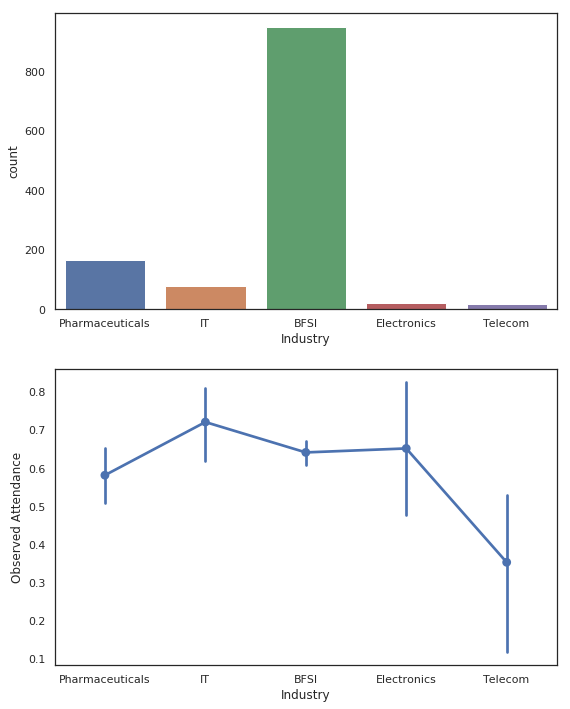

In [16]:
sns.set(rc={'figure.figsize': (9, 6)})
sns.set_style('white')
data['Observed Attendance'].replace({'no': 0, 'yes': 1}, inplace=True)

# To visualize Industry and Attendance by Industry
def plot_categorical_column(column_name):
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.countplot(x=column_name, data=data, ax=ax1)
    sns.pointplot(x=column_name, y='Observed Attendance', data=data, ax=ax2)
plot_categorical_column('Industry')

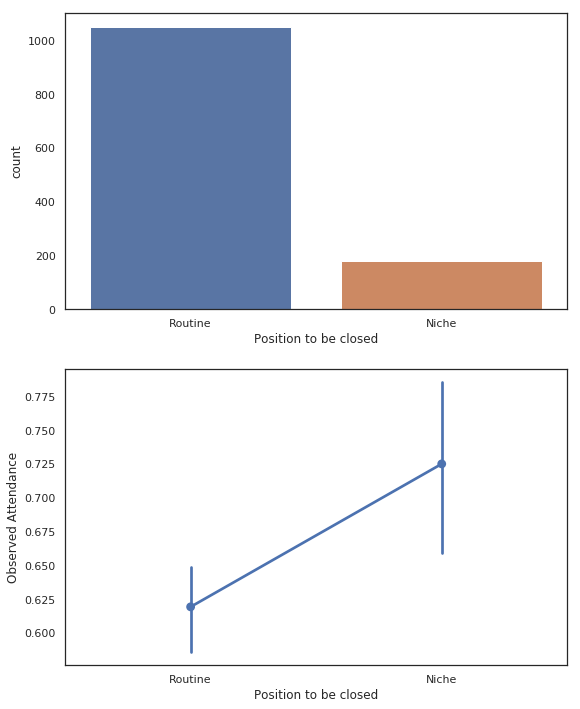

In [17]:
# To visualize Position and Attendance by Position
def plot_categorical_column(column_name):
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.countplot(x=column_name, data=data, ax=ax1)
    sns.pointplot(x=column_name, y='Observed Attendance', data=data, ax=ax2)
plot_categorical_column('Position to be closed')

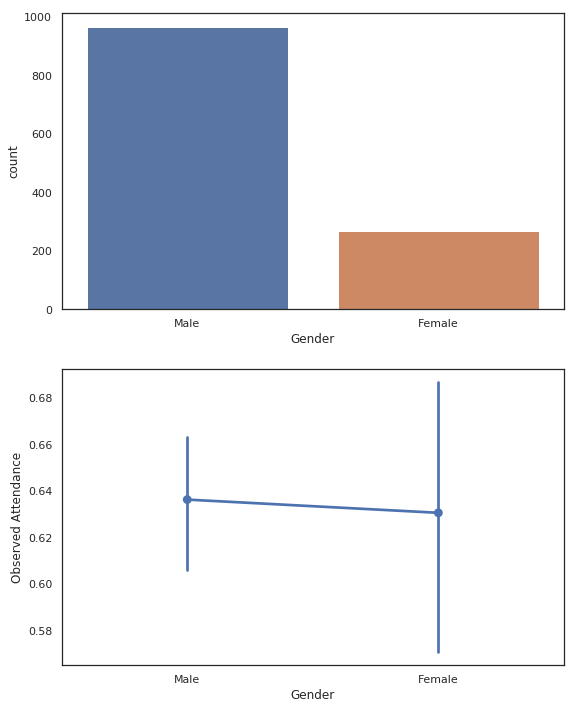

In [18]:
# To visualize Gender and Attendance by Gender
def plot_categorical_column(column_name):
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.countplot(x=column_name, data=data, ax=ax1)
    sns.pointplot(x=column_name, y='Observed Attendance', data=data, ax=ax2)
plot_categorical_column('Gender')

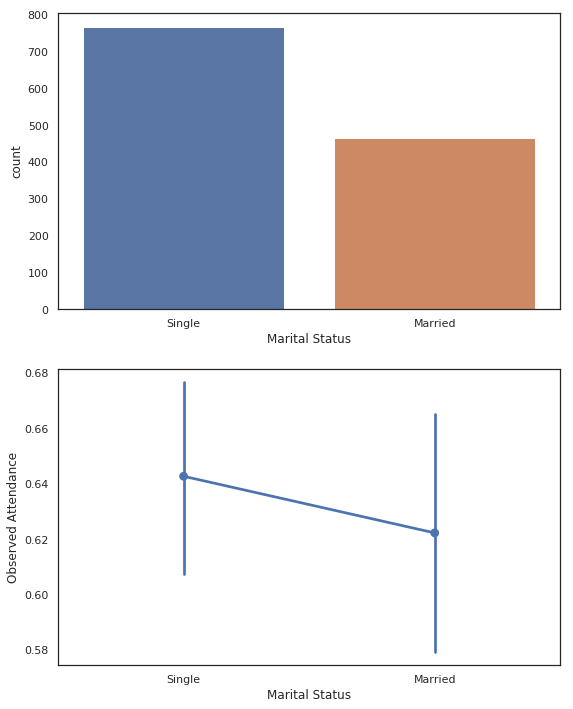

In [19]:
# To visualize Status and Attendance by Status
def plot_categorical_column(column_name):
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.countplot(x=column_name, data=data, ax=ax1)
    sns.pointplot(x=column_name, y='Observed Attendance', data=data, ax=ax2)
plot_categorical_column('Marital Status') 

### Анализ данных с помощью Хи-квадрата

In [55]:
# If p-value is bigger than 0.05, there is no reason to reject the null hypothesis - no connection
# If p-value is less than 0.05, we reject the null hypothesis - there is a connection
# If chi-square is bigger than critical value of chi-square (from the table "Critical values of chi-square distribution"), there is a connection

In [21]:
contingency_table1=pd.crosstab(data['Position to be closed'], data['Observed Attendance'])
contingency_table1

Observed Attendance,0,1
Position to be closed,,
Niche,50,132
Routine,400,651


In [60]:
import scipy.stats as stats
result_position = stats.chi2_contingency(contingency_table1)
print('p-value:{0}'.format(result_position[1]))
print('chi-square:{0}'.format(result_position[0]))

# In this case we reject the null hypothesis, there is a connection
# Chi-square is bigger than critical value (3,8, n = 1)

p-value:0.007917834451071762
chi-square:7.051965034293109


In [23]:
contingency_table2=pd.crosstab(data['Gender'], data['Observed Attendance'])
contingency_table2

Observed Attendance,0,1
Gender,,
Female,99,169
Male,351,614


In [24]:
import scipy.stats as stats
result_gender = stats.chi2_contingency(contingency_table2)
print('p-value:{0}'.format(result_gender[1]))
print('chi-square:{0}'.format(result_gender[0]))

# In this case we do not reject the null hypothesis, there is no SIGNIFICANT connection

p-value:0.9211921027949808
chi-square:0.009787580100213711


In [25]:
contingency_table3=pd.crosstab(data['Marital Status'], data['Observed Attendance'])
contingency_table3

Observed Attendance,0,1
Marital Status,,
Married,176,290
Single,274,493


In [26]:
import scipy.stats as stats
result_status = stats.chi2_contingency(contingency_table3)
print('p-value:{0}'.format(result_status[1]))
print('chi-square:{0}'.format(result_status[0]))

# In this case we do not reject the null hypothesis, there is no SIGNIFICANT connection

p-value:0.5079035654592974
chi-square:0.43838378771428166


In [27]:
contingency_table4=pd.crosstab(data['Industry'], data['Observed Attendance'])
contingency_table4

Observed Attendance,0,1
Industry,,
BFSI,340,609
Electronics,8,15
IT,22,57
Pharmaceuticals,69,96
Telecom,11,6


In [61]:
import scipy.stats as stats
result_industry = stats.chi2_contingency(contingency_table4)
print('p-value:{0}'.format(result_industry[1]))
print('chi-square:{0}'.format(result_industry[0]))

# In this case we reject the null hypothesis, there is a connection
# Chi-square is bigger than critical value (9,5, n = 4)

p-value:0.03124616649639521
chi-square:10.615232890375811


### Вывод

*Таким образом, мы можем сделать вывод, что существует значимая связь между посещением интервью и типом вакансии и индустрией, а в случае с анализом связи между посещением интервью и полом и семейным положением не существует значимой связи.*

### Анализ с помощью бинарной логистической регрессии

##### Посещаемость интервью - зависимая переменная, тип вакансии - независимая. Для анализа выбраны эти переменные, так как связь между ними наиболее сильная по результатам анализа с помощью Хи-квадрата

In [34]:
data['Position to be closed'].replace({'Routine': 0, 'Niche': 1}, inplace=True)

In [35]:
# Independent variable
x = data.iloc[:, [1]].values

  
# Dependent variable
y = data.iloc[:, 4].values

In [36]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(

        x, y, test_size = 0.25, random_state = 0)

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(xtrain, ytrain)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
y_pred = classifier.predict(xtest)

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)

# True Positive - 0, True Negative - 193, False Positive - 116, False Negative - 0.


Confusion Matrix : 
 [[  0 116]
 [  0 193]]


In [43]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))

# Percentage of correct answers

Accuracy :  0.6245954692556634


### Вывод

*Accuracy показывает долю верных ответов, в нашем случае - 0,62. Эта модель достаточно хорошо описывает данные, но этого не достаточно для точного прогноза посещаемости интервью, исходя из типа вакансии.*

### Итоги

*Мы взяли набор данных о посещаемости интервью соискателями в индийских компаниях. Проанализировав их, мы решили сосредоточиться на следующих факторах: индустрия, тип вакансии, пол кандидата, его семейное положение. Так как это категориальные данные, мы решили использовать для анализа метод Хи-квадрата, который позволил нам выявить наличие статистически значимой связи между посещаемостью интервью и типом вакансии и индустрией. Но наиболее сильной оказалась связь между посещаемостью и типом вакансии, поэтому для бинарной логистической регрессии использовался именно тип вакансии. Точность модели составила 62%, что не является достаточным основанием для предсказания посещаемости на основе типа вакансии.*

### Информационные источники

1. http://espressocode.top/
2. https://coderlessons.com/
3. https://habr.com/ru/
4. [Критические значения Хи-квадрата](https://www.matematicus.ru/wp-content/uploads/2019/02/kriticheskie-tochki-raspredeleniya.png)